In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [18]:
data = pd.read_csv('/content/customer_data_with_clv.csv')
data.head() # clv means (customer lifetime values)

,customer_id,purchase_date,purchase_amount,last_purchase_date,interaction_count,CLV
0,1,2022-08-28,493.90,2024-01-19,36,3622.98
1,1,2022-12-19,252.92,2024-01-19,17,3622.98
2,1,2022-12-26,376.67,2024-01-19,32,3622.98
3,1,2023-05-28,173.78,2024-01-19,34,3622.98
4,1,2023-02-07,278.60,2024-01-19,27,3622.98


In [38]:
data.tail()

,customer_id,purchase_date,purchase_amount,last_purchase_date,interaction_count,CLV
10754,1000,2023-04-14,273.17,2023-11-08,34,4106.34
10755,1000,2023-03-11,281.14,2023-11-08,39,4106.34
10756,1000,2022-10-28,393.53,2023-11-08,38,4106.34
10757,1000,2023-02-12,465.17,2023-11-08,32,4106.34
10758,1000,2023-03-29,364.20,2023-11-08,14,4106.34


In [19]:
data.shape

(10759, 6)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10759 entries, 0 to 10758
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         10759 non-null  int64  
 1   purchase_date       10759 non-null  object 
 2   purchase_amount     10759 non-null  float64
 3   last_purchase_date  10759 non-null  object 
 4   interaction_count   10759 non-null  int64  
 5   CLV                 10759 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 504.5+ KB


In [21]:
data.describe()

,customer_id,purchase_amount,interaction_count,CLV
count,10759.000000,10759.000000,10759.000000,10759.000000
mean,498.193791,253.743604,25.012734,3503.306460
std,292.935379,141.780341,14.765104,1294.472083
min,1.000000,10.010000,0.000000,17.640000
25%,241.000000,129.925000,12.000000,2641.450000
50%,495.000000,254.120000,25.000000,3645.620000
75%,754.000000,376.480000,38.000000,4432.030000
max,1000.000000,499.990000,50.000000,6415.320000


In [22]:
data.isnull().sum()

customer_id           0
purchase_date         0
purchase_amount       0
last_purchase_date    0
interaction_count     0
CLV                   0
dtype: int64

<Axes: ylabel='interaction_count'>

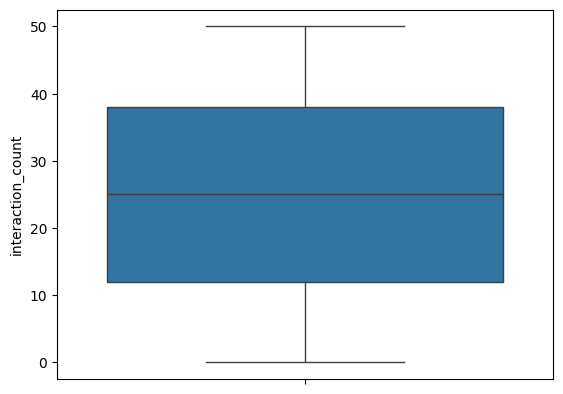

In [23]:
sns.boxplot(data['interaction_count'])

In [24]:
duplicate = data.duplicated().sum()
print(duplicate)

0


In [25]:
data.drop_duplicates(inplace=True)

In [26]:
data.shape

(10759, 6)

<Axes: ylabel='purchase_amount'>

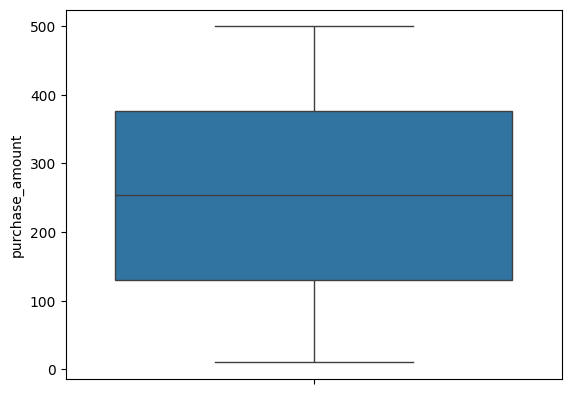

In [27]:
sns.boxplot(data['purchase_amount'])

In [28]:
from sklearn.model_selection import train_test_split

In [42]:
feature = ['purchase_amount', 'interaction_count']
target = 'CLV'

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data[feature], data[target], test_size=0.2, random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model = LinearRegression()

In [47]:
model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_test_pred = model.predict(X_test)

In [49]:
print(y_test_pred)

[3577.9534472  3578.67183526 3630.50675285 ... 3499.28228723 3327.14981251
 3305.32665221]


In [51]:
model.score(X_test, y_test)

0.013948184185377577

In [63]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [64]:
mae = mean_absolute_error(y_test, y_test_pred) # mean absolute error
mae

1028.9949772717862

In [62]:
mse = mean_squared_error(y_test, y_test_pred) # mean squared error
mse

1600245.9588340796

In [58]:
r2 = r2_score(y_test, y_test_pred ) # r2 score
r2

0.013948184185377577

In [59]:
x = [[300,8]]# input for predicting clv (customer lifetime values)
y_pred = model.predict(x)
y_pred

array([3550.34324278])